In [1]:
import pandas as pd

In [2]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


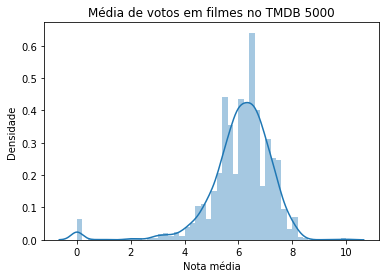

In [5]:
# distplot / densidade (default)
import seaborn as sns

ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Média de votos em filmes no TMDB 5000')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


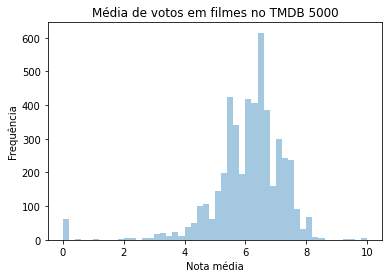

In [6]:
# frequência
ax = sns.distplot(tmdb.vote_average, norm_hist = False, kde = False)
ax.set(xlabel = 'Nota média', ylabel = 'Frequência')
ax.set_title('Média de votos em filmes no TMDB 5000')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


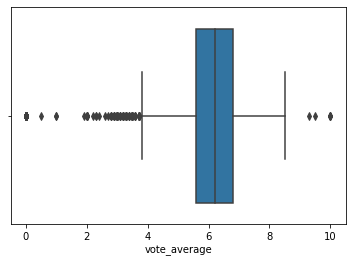

In [7]:
sns.boxplot(tmdb.vote_average)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

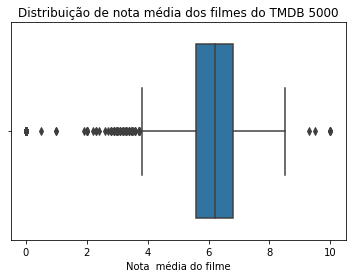

In [8]:
ax = sns.boxplot(tmdb.vote_average)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000')

Tem algo estranho nos dados. Não faz sentido filmes com nota média 0 ou 10.

In [9]:
# apenas os filmes com nota média = 0
tmdb.query('vote_average == 0').head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [10]:
# apenas os filmes com nota média = 10
tmdb.query('vote_average == 10')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


Detectamos que alguns filmes tinham poucos votos ou, até mesmo, nenhum voto.

In [11]:
# selecionando apenas os filmes com mais de 10 votos
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


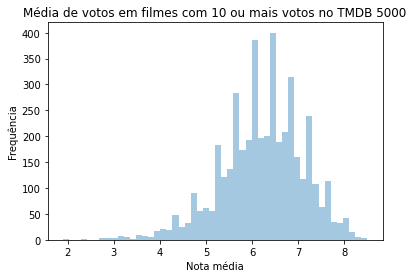

In [12]:
# frequência dos filmes com mais de 10 votos
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist = False, kde = False)
ax.set(xlabel = 'Nota média', ylabel = 'Frequência')
ax.set_title('Média de votos em filmes com 10 ou mais votos no TMDB 5000')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


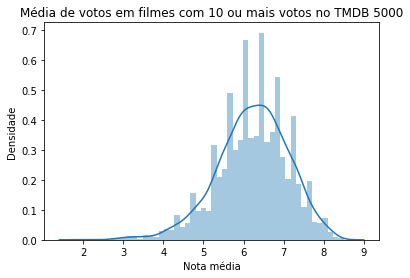

In [13]:
# frequência dos filmes com mais de 10 votos
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Média de votos em filmes com 10 ou mais votos no TMDB 5000')
ax

Maneira VISUAL de verificar quantos porcentos dos filmes estão acima ou abaixo de determinada nota:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


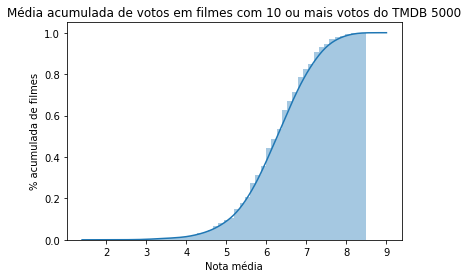

In [14]:
# proproção acumulada de filmes
# frequência dos filmes com mais de 10 votos
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,
                  hist_kws = {'cumulative': True},    # parâmetros extras do matplotlib
                  kde_kws = {'cumulative': True})
ax.set(xlabel = 'Nota média', ylabel = '% acumulada de filmes')
ax.set_title('Média acumulada de votos em filmes com 10 ou mais votos do TMDB 5000')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição de nota média dos filmes com 10 ou mais votos do TMDB 5000')

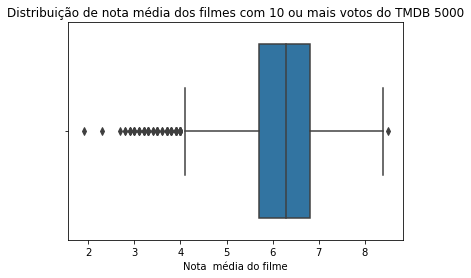

In [15]:
# boxplot dos filmes com 10 ou mais votos, lembra uma distribuição normal
ax = sns.boxplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes com 10 ou mais votos do TMDB 5000')

# Analisaremos as avaliações do movielens

In [16]:
notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
# calculandos as médias das notas
notas_media_por_filme = notas.groupby('movieId')['rating'].mean()
notas_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


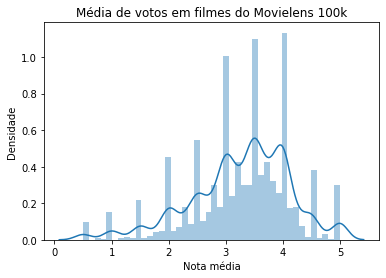

In [18]:
# frequência dos filmes 
ax = sns.distplot(notas_media_por_filme.values)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Média de votos em filmes do Movielens 100k')
ax

In [19]:
# apenas filmes com 10 ou mais votos
quantidade_de_votos_por_filme = notas.groupby('movieId').count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query('rating >= 10').index
filmes_com_pelo_menos_10_votos

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2269)

In [20]:
# média dos filmes com 10 votos ou mais
nota_media_dos_filmes_com_pelo_menos_10_votos = notas_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


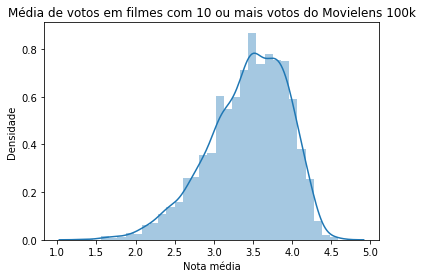

In [21]:
# frequência dos filmes com mais de 10 votos
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel = 'Nota média', ylabel = 'Densidade')
ax.set_title('Média de votos em filmes com 10 ou mais votos do Movielens 100k')
ax

Maneira VISUAL de verificar quantos porcentos dos filmes estão acima ou abaixo de determinada nota:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


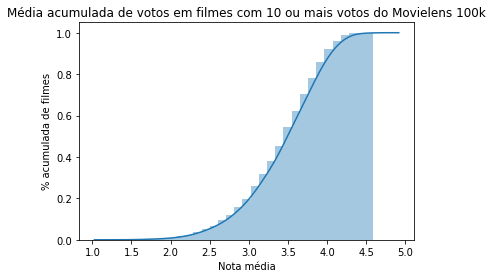

In [22]:
# proproção acumulada de filmes
# frequência dos filmes com mais de 10 votos
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values,
                  hist_kws = {'cumulative': True},    # parâmetros extras do matplotlib
                  kde_kws = {'cumulative': True})
ax.set(xlabel = 'Nota média', ylabel = '% acumulada de filmes')
ax.set_title('Média acumulada de votos em filmes com 10 ou mais votos do Movielens 100k')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição de nota média dos filmes com 10 ou mais votos do Movielens 100k')

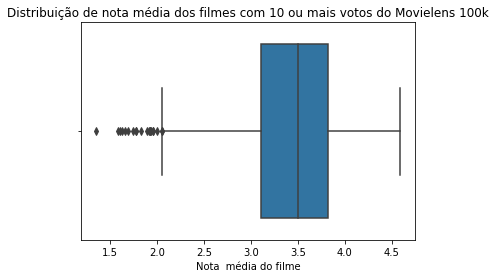

In [23]:
# boxplot dos filmes com 10 ou mais votos, lembra uma distribuição normal
ax = sns.boxplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota  média do filme')
ax.set_title('Distribuição de nota média dos filmes com 10 ou mais votos do Movielens 100k')

# Analisando a distribuição dos dados capturados de outros campos do TMDB

In [24]:
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


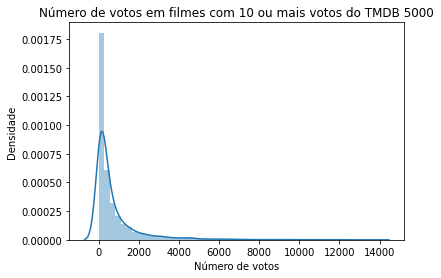

In [25]:
# frequência da quantidade de votos - vote_count
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel = 'Número de votos', ylabel = 'Densidade')
ax.set_title('Número de votos em filmes com 10 ou mais votos do TMDB 5000')
ax

In [26]:
# orçamento
tmdb.budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4798       220000
4799         9000
4800            0
4801            0
4802            0
Name: budget, Length: 4803, dtype: int64

In [27]:
# apenas os filmes com orçamento conhecido (> 0)
tmdb.query('budget > 0').budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4791           13
4792        20000
4796         7000
4798       220000
4799         9000
Name: budget, Length: 3766, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


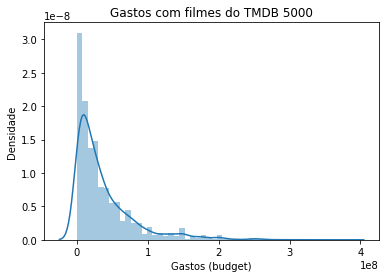

In [28]:
# distribuição do orçamento para os filmes com budget > 0
ax = sns.distplot(tmdb.query('budget > 0').budget)
ax.set(xlabel = 'Gastos (budget)', ylabel = 'Densidade')
ax.set_title('Gastos com filmes do TMDB 5000')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


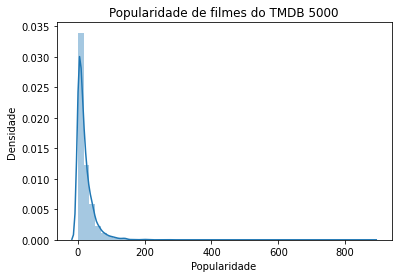

In [29]:
# distribuição da popularidade
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel = 'Popularidade', ylabel = 'Densidade')
ax.set_title('Popularidade de filmes do TMDB 5000')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


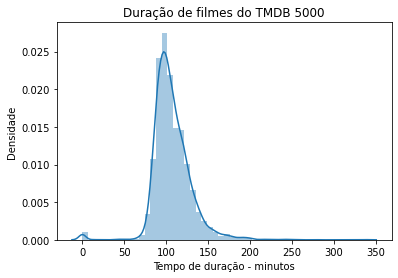

In [30]:
# distribuição do tempo de duração (runtime)
ax = sns.distplot(tmdb.runtime)
ax.set(xlabel = 'Tempo de duração - minutos', ylabel = 'Densidade')
ax.set_title('Duração de filmes do TMDB 5000')
ax

In [31]:
# excluindo valores nulos do tempo de duração dos filmes
tmdb.runtime.dropna()

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4798     81.0
4799     85.0
4800    120.0
4801     98.0
4802     90.0
Name: runtime, Length: 4801, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


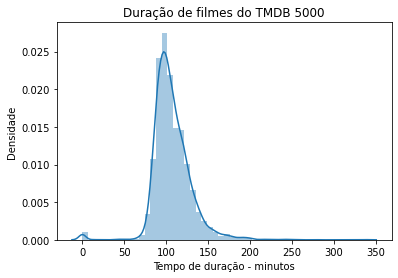

In [32]:
# distribuição do tempo de duração sem os nulos
ax = sns.distplot(tmdb.runtime.dropna())
ax.set(xlabel = 'Tempo de duração - minutos', ylabel = 'Densidade')
ax.set_title('Duração de filmes do TMDB 5000')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


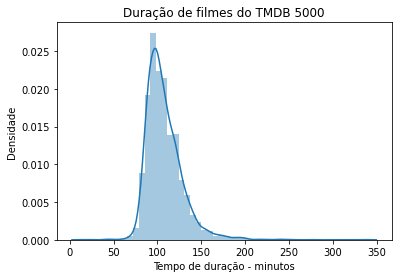

In [33]:
# retirando os tempos de duração == 0
ax = sns.distplot(tmdb.query('runtime > 0').runtime.dropna())
ax.set(xlabel = 'Tempo de duração - minutos', ylabel = 'Densidade')
ax.set_title('Duração de filmes do TMDB 5000')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


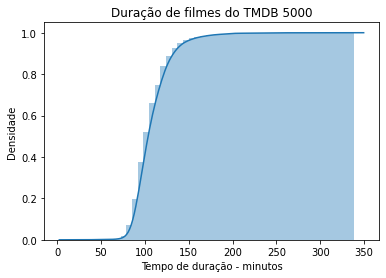

In [34]:
# distribuição cumulativa
ax = sns.distplot(tmdb.query('runtime > 0').runtime.dropna(),
                  hist_kws = {'cumulative': True},    # parâmetros extras do matplotlib
                  kde_kws = {'cumulative': True})
ax.set(xlabel = 'Tempo de duração - minutos', ylabel = 'Densidade')
ax.set_title('Duração de filmes do TMDB 5000')
ax

In [35]:
# 80% quantile
print('80% dos filmes tem menos de {} minutos de duração.'.format(tmdb.query('runtime > 0').runtime.dropna().quantile(q = 0.8)))

80% dos filmes tem menos de 121.0 minutos de duração.


# Movielens: média dos filmes com pelo menos 10 votos.

In [36]:
print('Média das das notas dos filmes com pelo menos 10 votos:', nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média das das notas dos filmes com pelo menos 10 votos: 3.4320503405352603


In [37]:
import matplotlib.pyplot as plt
import numpy as np

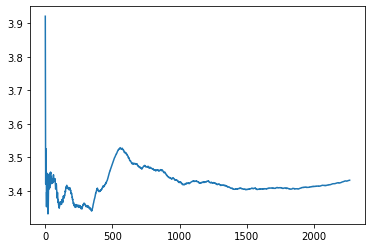

In [38]:
# adicionar as médias cumulativas, quantos maior a amostra, mais estável
medias = list()

for i in range(1, len(nota_media_dos_filmes_com_pelo_menos_10_votos)):
  medias.append(nota_media_dos_filmes_com_pelo_menos_10_votos[0:i].mean())

plt.plot(medias)

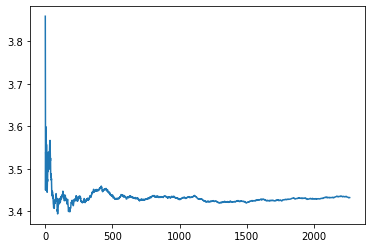

In [39]:
# modificando a ordem (não sabemos se os dados estão numa ordem específica)
medias = list()

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

Intervalo de confiança com teste Z

In [40]:
from statsmodels.stats.weightstats import zconfint

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
# teste z para intervalo com 95% de confiança (usado em amostras grandes: > 30)
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [42]:
from statsmodels.stats.weightstats import DescrStatsW

In [43]:
# cria um objeto do tipo statsmodel, usado no teste T (usado em amostras pequenas: <30)
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)

In [44]:
# teste T de intervalo de confiança para 95% de confiança 
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Analisando o Filme 1:

In [45]:
filmes = pd.read_csv('movies.csv')
filmes.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [46]:
notas1 = notas.query('movieId == 1')
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


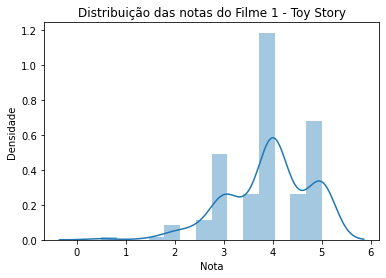

In [47]:
# histograma do Filme 1 (Toy Story)
ax = sns.distplot(notas1.rating)
ax.set(xlabel = 'Nota', ylabel = 'Densidade')
ax.set_title('Distribuição das notas do Filme 1 - Toy Story')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição das notas do filme 1 - Toy Story')

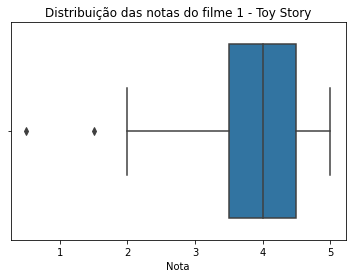

In [48]:
# boxplot do filme 1 - toy story
ax = sns.boxplot(notas1.rating)
ax.set(xlabel='Nota')
ax.set_title('Distribuição das notas do filme 1 - Toy Story')

In [49]:
# confirmamos a mediana = 4
notas1.describe()

,userId,movieId,rating,timestamp
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [50]:
# intervalo com 95% de confiança para o teste Z (215 amostras)
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [51]:
from statsmodels.stats.weightstats import ztest

In [52]:
# novo teste, informando que acreditamos que a nota do ToyStory seja igual à nota média dos filmes
ztest(notas1.rating, value = nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

(8.586342305916716, 8.978190401886942e-18)

ztest retorna uma tupla com 'teste estatísticos e o p-value'

Como o p-value é muito pequeno, 8,97 x 10^(-18), menor que 0,05, descartamos
a hipótese que a média do Filme 1 (3,92) é igual a média dos filmes (3,43).

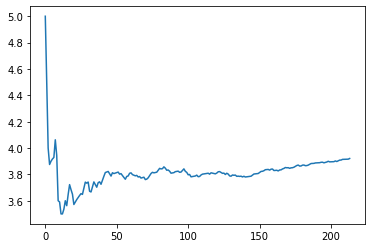

In [53]:
# comportamento da médida do Filme 1 ao aumentarmos a amostra
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

medias = [temp[0:i].mean() for i in range(1, len(temp))]
plt.plot(medias)

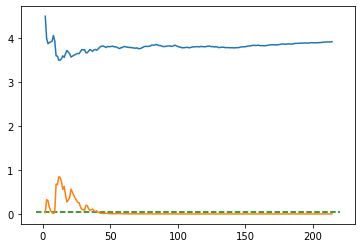

In [54]:
# média e p-value do z-test a medida que aumentamos a amostra
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = nota_media_dos_filmes_com_pelo_menos_10_votos.mean())
  return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))]) # a partir do 2, não tem como fazer o teste com apenas 1 valor

plt.plot(valores[:, 0] ,valores[:, 1])  #(qntd amostras, média)
plt.plot(valores[:, 0] ,valores[:, 2])  #(qntd amostras, p-value)
plt.hlines(y = 0.05, xmin = -5, xmax = len(temp) + 5, linestyles='--', color = 'g')

Nota-se que inicialmente a média é alta e cai para aproximadamente o valor da média das notas. Consequentemente, o p-value se aproxima de 1, pois a amostra é pequena. Entre uma amostra de tamanho 30 e 40, o p-value começa a estabilizar.

## Comparação de dois conjuntos de amostras

In [55]:
# intervalor de confiança entre duas amostras, antes era uma amostra com uma média
print(ztest(notas1.rating, notas.rating))
print(ztest(notas1.rating, nota_media_dos_filmes_com_pelo_menos_10_votos))
zconfint(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)
(12.64176977802645, 1.2422593409480636e-36)


(0.2799245129192442, 0.5588219849631111)

In [56]:
# intervalo de confiança entre duas notas:
print('A média de Toy Story está entre {} e {} mais alta que a média dos filmes.'.format(zconfint(notas1.rating, notas.rating)[0], zconfint(notas1.rating, notas.rating)[1]))

A média de Toy Story está entre 0.2799245129192442 e 0.5588219849631111 mais alta que a média dos filmes.


In [57]:
from scipy.stats import ttest_ind

In [58]:
# t-test entre duas amostras usando ttest_ind da scipy.stats
ttest_ind(notas1.rating, notas.rating)

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [59]:
# intervalo de confiança pelo statsmodel - t-test
descr_todas_notas = DescrStatsW(notas.rating)
descr_toy_story = DescrStatsW(notas1.rating)
comparacao = descr_todas_notas.get_compare(descr_toy_story)   # comparando as médias
print(comparacao.summary())
print(comparacao.summary(use_t = False))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.4194      0.071     -5.894      0.000      -0.559      -0.280
                          Test for equality of means                          
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.4194      0.071     -5.894      0.000      -0.559      -0.280


## Boxplot

In [60]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


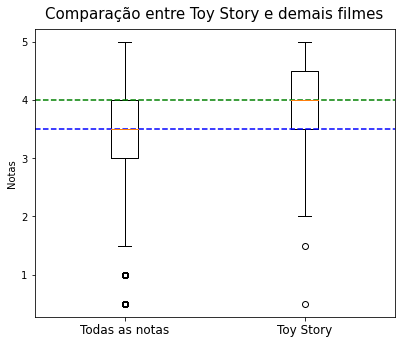

In [61]:
# comparando os boxplot de todos os filmes com Toy Story
fig = plt.figure(figsize = (5, 4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.boxplot([notas.rating, notas1.rating])
eixo.set_title('Comparação entre Toy Story e demais filmes', fontsize = 15, pad = 10)
eixo.set_xticklabels(['Todas as notas', 'Toy Story'], fontsize = 12)
eixo.set_ylabel('Notas')
eixo.axhline(notas1.rating.median(), color = 'g', linestyle = '--')
eixo.axhline(notas.rating.median(), color = 'b', linestyle = '--')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Notas')

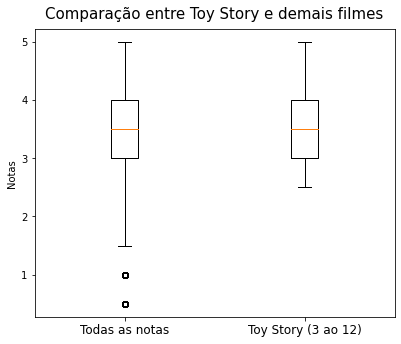

In [62]:
# comparando as notas com amostras pequenas
fig = plt.figure(figsize = (5, 4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.boxplot([notas.rating, notas1[3:12].rating])
eixo.set_title('Comparação entre Toy Story e demais filmes', fontsize = 15, pad = 10)
eixo.set_xticklabels(['Todas as notas', 'Toy Story (3 ao 12)'], fontsize = 12)
eixo.set_ylabel('Notas')
# eixo.axhline(notas1.rating.median(), color = 'g', linestyle = '--')
# eixo.axhline(notas.rating.median(), color = 'b', linestyle = '--')

In [63]:
# test t para uma amostra pequena
descr_todas_notas = DescrStatsW(notas.rating)
descr_toy_story = DescrStatsW(notas1[3:12].rating)
comparacao = descr_todas_notas.get_compare(descr_toy_story)   # comparando as médias
print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0540      0.348     -0.155      0.877      -0.735       0.627


# Comparar a média de dois filmes

In [64]:
filmes.query('movieId in [1, 593, 72226]')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Notas')

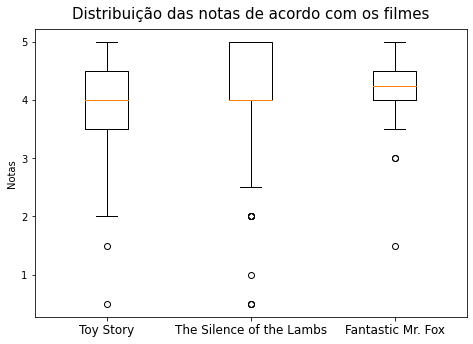

In [65]:
# comparando as notas com amostras pequenas
notas1 = notas.query('movieId == 1')
notas593 = notas.query('movieId == 593')
notas72226 = notas.query('movieId == 72226')

fig = plt.figure(figsize = (6, 4))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.boxplot([notas1.rating, notas593.rating, notas72226.rating])
eixo.set_title('Distribuição das notas de acordo com os filmes', fontsize = 15, pad = 10)
eixo.set_xticklabels(['Toy Story', 'The Silence of the Lambs', 'Fantastic Mr. Fox'], fontsize = 12)
eixo.set_ylabel('Notas')

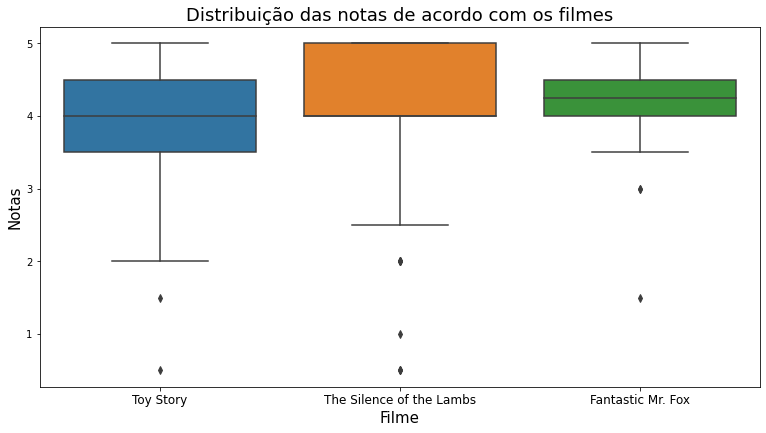

In [66]:
# boxplot pela seaborn
fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax = sns.boxplot(x = 'movieId', y = 'rating', data = notas.query('movieId in (1, 593, 72226)'))
ax.set_xlabel('Filme', fontsize = 15)
ax.set_ylabel('Notas', fontsize = 15)
ax.set_title('Distribuição das notas de acordo com os filmes', fontsize = 18)
ax.set_xticklabels(['Toy Story', 'The Silence of the Lambs', 'Fantastic Mr. Fox'], fontsize = 12)
ax

In [67]:
# test t: comparação entre filme 1 e filme 593
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)   # comparando as médias
print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.2404      0.077     -3.132      0.002      -0.391      -0.090


In [68]:
# test t: comparação entre filme 72226 e filme 593
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)   # comparando as médias
print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.0780      0.208     -0.374      0.708      -0.488       0.332


O intervalo inclui tanto a chance do filme ser pior como melhor.
P>|t| muito alto, ou seja, não há diferença significativa.

In [69]:
comparacao = descr_1.get_compare(descr_72226)   # comparando as médias
print(comparacao.summary())

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.1624      0.206     -0.788      0.431      -0.568       0.243


Há diferenças significativas apenas entre filme 1 - Toy Story - e o filme 593 - The Silence of the Lambs. Realizando as demais comparações, não podemos dizer qual filme é melhor ou pior.

In [70]:
# Contabilizando os 3 filmes
notas.query('movieId in (1, 593, 72226)').groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


Filme 72226 - Fantastic Mr. Fox - possui amostra pequena, o certo é realizar o T-test.

In [71]:
from scipy.stats import normaltest

In [73]:
# teste de normalidade da distribuição
stat, p = normaltest(notas1.rating)

In [75]:
print(stat, p)

18.220369223286593 0.00011053430732728716


Como o p-value é bem menor que 0,05, descartamos a hipótese nula, logo nossos dados não possuem uma distribuição normal.

Os teste T e Z necessitam de uma distribuição normal para serem aplicados.

Assim, aplicaremos um teste não paramétrico para distribuição desconhecida:

In [76]:
from scipy.stats import ranksums

In [79]:
# teste ranksums entre Toy Story e The Silence of the Lambs
stat, p = ranksums(notas1.rating, notas593.rating)
print(stat, p)

-3.5930962013771377 0.0003267718756440693


A hipótese nula do teste 'ranksums' é que as duas amostras são extraídos da mesma distribuição.
A hipótese alternativa é que os VALORES (e não a média, como seria numa distribuição NORMAL) de uma distribuição são maiores que os VALORES da outra.

Neste caso acima, descartamos a hipótese nula, logo concluímos que provavelmente uma nota aleatória - e não a média, como seria numa distribuição NORMAL - de The Silence of the Lambs seria maior que uma nota aleatória de Toy Story.